In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
import tensorflow.keras
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
img = cv2.imread(r"E:\college\Photos\Male\IMG_20220328_214415.jpg")

In [5]:
cv2.imshow('Output',img)
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [7]:
img.shape

(256, 192, 3)

In [10]:
img1 = cv2.resize(img,(256,256))

In [11]:
cv2.imshow('Resize Image',img1)
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [12]:
img1.shape

(256, 256, 3)

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_data = train_datagen.flow_from_directory(
    "E:\college\Photos",
    classes = ['Male' , 'Female'],
    batch_size = 64,
    target_size = (256,256)
)

Found 37 images belonging to 2 classes.


In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_data = train_datagen.flow_from_directory(
    "E:\college\Photos",
    classes = ['TestMale' , 'TestFemale'],
    batch_size = 64,
    target_size = (256,256)
)

Found 8 images belonging to 2 classes.


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [25]:
model = Sequential()
#conv1 layer
model.add(Conv2D(input_shape = (256,256,3),filters = 256,kernel_size = (5,5),kernel_initializer="glorot_uniform",padding = 'same',strides = 2))
model.add(Conv2D(filters=64,kernel_size=(5,5), padding="same",activation='relu',use_bias=True))
model.add(MaxPooling2D((2, 2)))

#conv2 layer
model.add(Conv2D(filters=128,kernel_size=(5,5), padding="same",activation='relu',use_bias=True))
model.add(MaxPooling2D((2, 2)))

#conv3 layer
model.add(Conv2D(filters=64,kernel_size=(5,5), padding="same",activation='relu',use_bias=True))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

#Hidden layer1
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))

#hidden layer 2

model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))

#hidden layer 3
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(2, activation='softmax'))

In [26]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     19456     
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      409664    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)       

In [28]:
result = model.fit(train_data,epochs = 20,validation_data = test_data)

Epoch 1/20
1/1 [==============================] - 9s 9s/step - loss: 0.6930 - accuracy: 0.5946 - val_loss: 2.4034 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 25s 25s/step - loss: 3.3093 - accuracy: 0.5405 - val_loss: 0.7037 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 26s 26s/step - loss: 0.6954 - accuracy: 0.5405 - val_loss: 0.7033 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 26s 26s/step - loss: 0.7153 - accuracy: 0.4595 - val_loss: 0.6910 - val_accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 26s 26s/step - loss: 0.6964 - accuracy: 0.4054 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 26s 26s/step - loss: 0.6912 - accuracy: 0.5946 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 26s 26s/step - loss: 0.6878 - accuracy: 0.5135 - val_loss: 0.7064 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=============

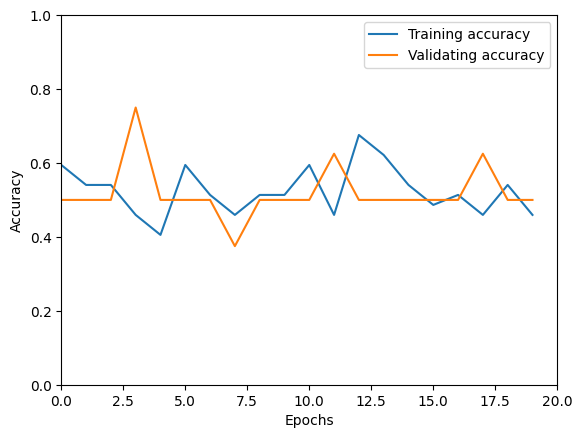

In [34]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], label='Training accuracy')
plt.plot(result.history['val_accuracy'], label='Validating accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.0,1])
plt.xlim([0,20])
plt.legend(loc = 'upper right')

Regularization technique

In [ ]:
#l1 regularization
